In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
file_path = "Dataset.csv" 
df = pd.read_csv(file_path)
df

,agent_id,supplier_id,Destination,Booking date,pax,booking_status,travel_date,coupon_redeem,Coupon Used?,costprice,markup,selling_price
0,4003,520,Dubai,2024-03-08,10,Confirmed,2024-03-27,1000,Yes,291137.688731,9078.398119,299216.086849
1,4711,292,Dubai,2024-07-16,1,Confirmed,2024-08-03,500,Yes,31399.560211,14033.499875,44933.060085
2,3037,864,Dubai,2024-07-16,9,Confirmed,2024-07-27,0,No,295263.854967,87840.292690,383104.147657
3,1609,430,Bali,2024-03-22,8,Confirmed,2024-04-02,0,No,326273.581726,9186.513831,335460.095557
4,3364,614,Kerala,2024-05-03,1,Confirmed,2024-07-23,2000,Yes,18327.862098,4574.085301,20901.947399
...,...,...,...,...,...,...,...,...,...,...,...,...
23652,1770,675,Kerala,2024-08-26,2,Confirmed,2024-10-23,2000,Yes,34983.171632,3582.979531,36566.151163
23653,1897,460,Bali,2024-12-07,7,Confirmed,2024-12-16,500,Yes,304801.317801,70697.636045,374998.953847
23654,2489,256,Bali,2024-10-06,7,Confirmed,2024-10-21,0,No,289118.625592,23648.658063,312767.283655
23655,1416,834,Maldives,2024-11-29,9,Canceled,2024-12-27,2000,Yes,583481.315117,61167.110490,642648.425607


## Display the first few rows of the dataset


In [14]:
df.head(5)

,agent_id,supplier_id,Destination,Booking date,pax,booking_status,travel_date,coupon_redeem,Coupon Used?,costprice,markup,selling_price
0,4003,520,Dubai,2024-03-08,10,Confirmed,2024-03-27,1000,Yes,291137.688731,9078.398119,299216.086849
1,4711,292,Dubai,2024-07-16,1,Confirmed,2024-08-03,500,Yes,31399.560211,14033.499875,44933.060085
2,3037,864,Dubai,2024-07-16,9,Confirmed,2024-07-27,0,No,295263.854967,87840.292690,383104.147657
3,1609,430,Bali,2024-03-22,8,Confirmed,2024-04-02,0,No,326273.581726,9186.513831,335460.095557
4,3364,614,Kerala,2024-05-03,1,Confirmed,2024-07-23,2000,Yes,18327.862098,4574.085301,20901.947399


## Basic information about the dataset


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23657 entries, 0 to 23656
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   agent_id        23657 non-null  int64  
 1   supplier_id     23657 non-null  int64  
 2   Destination     23657 non-null  object 
 3   Booking date    23657 non-null  object 
 4   pax             23657 non-null  int64  
 5   booking_status  23657 non-null  object 
 6   travel_date     23657 non-null  object 
 7   coupon_redeem   23657 non-null  int64  
 8   Coupon Used?    23657 non-null  object 
 9   costprice       23657 non-null  float64
 10  markup          23657 non-null  float64
 11  selling_price   23657 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 2.2+ MB


## Descriptive statistics


In [18]:
df.describe()


,agent_id,supplier_id,pax,coupon_redeem,costprice,markup,selling_price
count,23657.000000,23657.000000,23657.000000,23657.000000,23657.000000,23657.000000,23657.000000
mean,3000.966141,599.875259,5.509828,870.503445,183091.706969,40804.353379,223025.556903
std,1152.284728,231.730114,2.868997,742.808416,124467.192885,44645.917013,156028.902350
min,1000.000000,200.000000,1.000000,0.000000,16215.849131,-26957.905804,14185.951872
25%,2008.000000,401.000000,3.000000,0.000000,85400.842694,8529.627745,104037.841695
50%,3007.000000,599.000000,6.000000,500.000000,159684.689381,27255.420743,190400.814247
75%,3991.000000,802.000000,8.000000,2000.000000,252587.392619,59949.699009,306221.588994
max,5000.000000,1000.000000,10.000000,2000.000000,659897.340328,322518.208625,978622.372539


# 1. Identify 3 short-term or long-term data observations


## Observation 1: Booking Status Distribution


In [11]:
booking_status_distribution = df['booking_status'].value_counts()
print("Booking Status Distribution:")
print(booking_status_distribution)


Booking Status Distribution:
booking_status
Confirmed    17732
Canceled      3530
Failed        2395
Name: count, dtype: int64


## Visualization 1: Booking Status Distribution

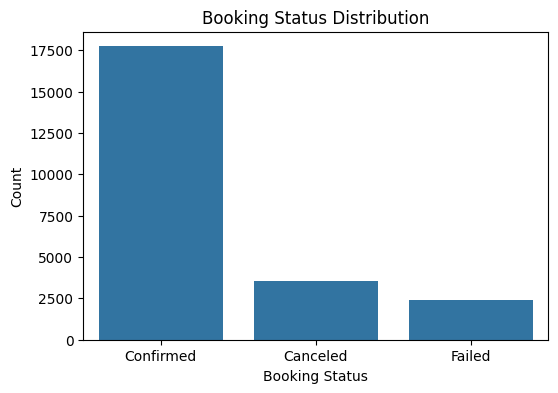

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(x='booking_status', data=df, order=df['booking_status'].value_counts().index)
plt.title('Booking Status Distribution')
plt.xlabel('Booking Status')
plt.ylabel('Count')
plt.savefig("Booking Status Distribution graph.png",dpi = 500)
plt.show()

## Observation 2: Identify negative markup values


In [15]:
negative_markup_percentage = (df["markup"] < 0).sum() / len(df) * 100
print(f"Percentage bookings with negative markup value: {negative_markup_percentage:.2f}%")

Percentage bookings with negative markup value: 9.48%


## Visualization 2: Distribution of Markup Values


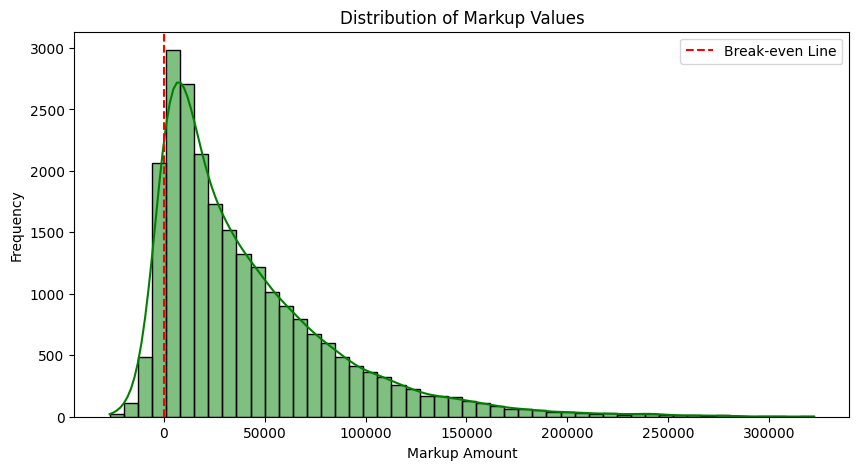

In [17]:
plt.figure(figsize=(10, 5))
sns.histplot(df["markup"], bins=50, kde=True, color='green')
plt.axvline(0, color='red', linestyle='--', label="Break-even Line")
plt.title("Distribution of Markup Values")
plt.xlabel("Markup Amount")
plt.ylabel("Frequency")
plt.legend()
plt.savefig("Distribution of Markup Values.png",dpi = 500)
plt.show()

## Observation 3: Coupon Usage Analysis


In [19]:
coupon_usage = df['Coupon Used?'].value_counts()
coupon_usage_counts = df["Coupon Used?"].value_counts(normalize=True) * 100
print("Coupon Usage Analysis:")
print(coupon_usage)
print("Coupon Usage Distribution as percentage:\n", coupon_usage_counts)

Coupon Usage Analysis:
Coupon Used?
Yes    17603
No      6054
Name: count, dtype: int64
Coupon Usage Distribution as percentage:
 Coupon Used?
Yes    74.409266
No     25.590734
Name: proportion, dtype: float64


## Visualization 3: Coupon Usage Analysis


C:\Users\vivek\AppData\Local\Temp\ipykernel_10484\3581491463.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Coupon Used?', data=df,palette="viridis")


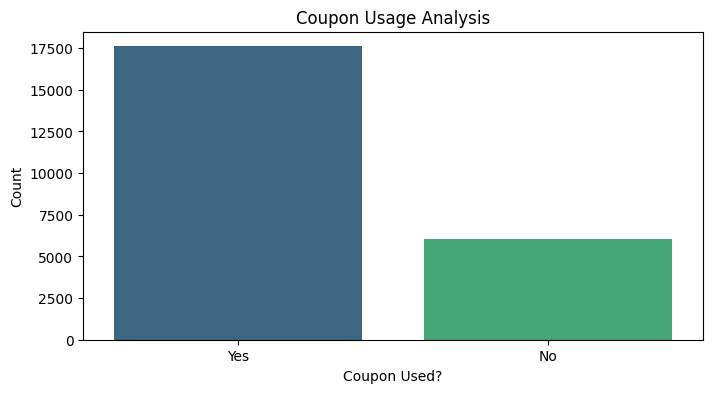

In [21]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Coupon Used?', data=df,palette="viridis")
plt.title('Coupon Usage Analysis')
plt.xlabel('Coupon Used?')
plt.ylabel('Count')
plt.savefig("Coupon Usage Analysis graph.png",dpi = 500)
plt.show()